In [1]:
import os
import cv2 as cv
import numpy as np

In [2]:
IMAGES_DIR = "../data/images"
LABELS_DIR = "../data/labels"
DIRS = ["train", "test", "val"]

OUTPUT_DIR = "../data/bounding_box"

LABELS = {
    0: "aegypti",
    1: "albopictus",
    2: "anopheles",
    3: "culex",
    4: "culiseta",
    5: "japonicus/koreicus"
}

{3: 2972, 4: 411, 2: 53, 1: 3006, 5: 275, 0: 33}


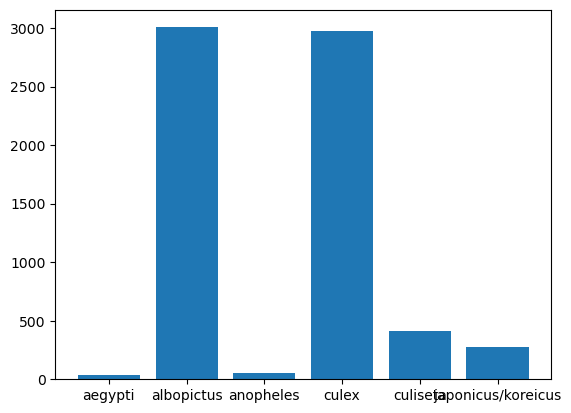

In [3]:
# Open all labels and count the number of each class

def get_labels(dir_type):
    labels = {}
    for file in os.listdir(os.path.join(LABELS_DIR, dir_type)):
        label_txt = np.loadtxt(os.path.join(LABELS_DIR, dir_type, file))
        label_val = label_txt[0].astype(int)
        if label_val in labels:
            labels[label_val] += 1
        else:
            labels[label_val] = 1
    return labels

labels_train = get_labels("train")
print(labels_train)

# Plot histogram of the labels

import matplotlib.pyplot as plt

plt.bar(labels_train.keys(), labels_train.values())
plt.xticks(list(labels_train.keys()), [LABELS[i] for i in labels_train.keys()])
plt.show()


In [4]:
def put_bounding_box(folder_type, img_name):
    image = cv.imread(os.path.join(IMAGES_DIR, folder_type, img_name))
    label = np.loadtxt(os.path.join(LABELS_DIR, folder_type, img_name.replace(".jpeg", ".txt")))
    
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    
    cls = LABELS[int(label[0])]
    x, y, w, h = label[1:]
    
    print(label)
    print(image.shape)
    
    # Convert to bottom left corner
    x = int((x - w/2) * image.shape[1])
    y = int((y - h/2) * image.shape[0])
    
    w = int(w * image.shape[1])
    h = int(h * image.shape[0])
    
    print(x, y, w, h)
    
    fig, ax = plt.subplots()    
    ax.imshow(image)
    rect = plt.Rectangle((x, y), w, h, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    
    ax.text(x, y, cls, color='r')
    
    plt.show()    

[1.         0.56217105 0.55226935 0.21381579 0.21168155]
(2688, 1520, 3)
692 1200 325 569


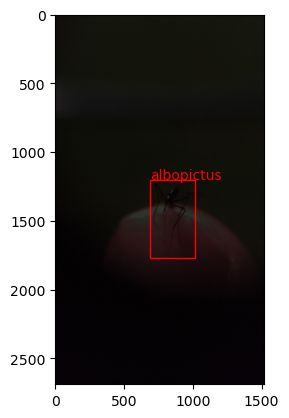

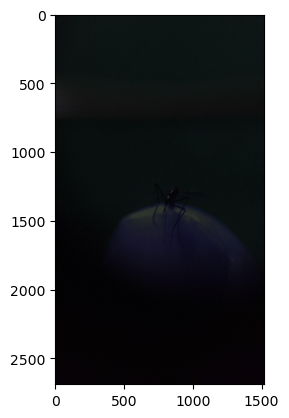

In [5]:
train_imgs = os.listdir(os.path.join(IMAGES_DIR, "train"))

put_bounding_box("train", train_imgs[4])

plt.imshow(cv.imread(os.path.join(IMAGES_DIR, "train", train_imgs[4])))
plt.show()